#Exercício 1

Considere, no espaço $\mathbb{R}^2$, as normas euclidiana $||.||_2$, da soma $||.||_1$ e do máximo $||.||_\infty$. Determine, geometricamente, para cada uma dessas normas, o conjunto $B=\{x\in \mathbb{R}^2 / ||x||=1\}$.




###**Exemplos de normas do $\mathbb{R}^n$**

- $$\|\mathbf{x}\|_2 = \bigg( \sum_{i=1}^n |x_i|^2 \bigg)^{1/2}, \qquad
\|\mathbf{x}\|_\infty = \max \limits _{1 \leq i \leq n} | x_{i} |, \qquad
\|\mathbf{x}\|_1 = \sum _{i=1} ^n | x_{i} |$$

- $\|\mathbf{x}\|_p = \bigg( \sum_{i=1}^n |x_i|^p \bigg)^{1/p}, \; p \geq 1$

- Esfera com centro na origem e raio unitário.
$$S = \{\mathbf{x} \in \mathbb{R}^n; \; \|\mathbf{x}\|=1\}$$


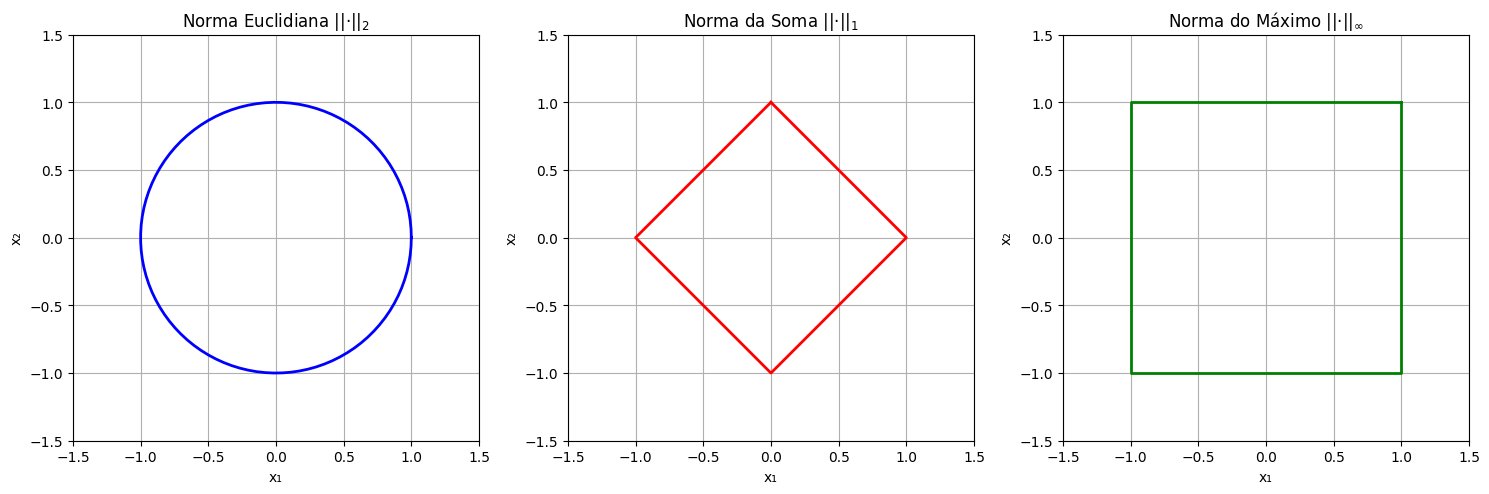

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_norm_balls():
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    theta = np.linspace(0, 2*np.pi, 100)
    
    x2 = np.cos(theta)
    y2 = np.sin(theta)
    axes[0].plot(x2, y2, 'b-', linewidth=2)
    axes[0].set_title('Norma Euclidiana $||·||_2$')
    axes[0].set_aspect('equal')
    axes[0].grid(True)
    
    x1 = np.concatenate([np.linspace(0, 1, 25), np.linspace(1, 0, 25), 
                         np.linspace(0, -1, 25), np.linspace(-1, 0, 25)])
    y1 = np.concatenate([1 - np.linspace(0, 1, 25), -1 + np.linspace(1, 0, 25),
                         -1 + np.linspace(0, 1, 25), 1 - np.linspace(1, 0, 25)])
    axes[1].plot(x1, y1, 'r-', linewidth=2)
    axes[1].set_title('Norma da Soma $||·||_1$')
    axes[1].set_aspect('equal')
    axes[1].grid(True)
    
    x_inf = [1, 1, -1, -1, 1]
    y_inf = [1, -1, -1, 1, 1]
    axes[2].plot(x_inf, y_inf, 'g-', linewidth=2)
    axes[2].set_title('Norma do Máximo $||·||_\\infty$')
    axes[2].set_aspect('equal')
    axes[2].grid(True)
    
    for ax in axes:
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_xlabel('x₁')
        ax.set_ylabel('x₂')
    
    plt.tight_layout()
    plt.show()

plot_norm_balls()

#Exercício 2
Considere uma base $B =  \{\mathbf{v}_1,\ldots,\mathbf{v}_{10}\}$ do $\mathbb{R}^{10}$ gerada pelo código abaixo. Implemente um código do processo de ortogonalização de Gram-Schmidt e obtenha uma base ortonormal do $\mathbb{R}^{10}$ a partir de $B$.

In [4]:
import numpy as np

def gram_schmidt(B):
    B = B.astype(float)
    n = B.shape[1]
    Q = np.zeros_like(B)
    
    for i in range(n):
        q = B[:, i].copy()
        
        for j in range(i):
            proj = np.dot(Q[:, j], B[:, i]) * Q[:, j]
            q -= proj
        
        norm = np.linalg.norm(q)
        if norm > 1e-10:
            Q[:, i] = q / norm
        else:
            Q[:, i] = q
    
    return Q


np.random.seed(42)
I = np.identity(10, dtype=int)
perturbation = np.random.randint(-3, 4, size=(10, 10))
B_int = I + perturbation

rank = np.linalg.matrix_rank(B_int)
print(f"Posto da matriz B: {rank}")

if rank == 10:
    base_ortonormal = gram_schmidt(B_int)
    
    print("\nBase ortonormal obtida:")
    for i in range(10):
        print(f"q{i+1} = {base_ortonormal[:, i]}")

    print("\nVerificação da ortonormalidade:")
    
    QTQ = base_ortonormal.T @ base_ortonormal
    print(f"Q^T * Q é identidade? {np.allclose(QTQ, np.identity(10))}")
    
    normas = [np.linalg.norm(base_ortonormal[:, i]) for i in range(10)]
    print(f"Todos os vetores têm norma 1? {np.allclose(normas, 1.0)}")
    
    ortogonal = True
    for i in range(10):
        for j in range(i+1, 10):
            if abs(np.dot(base_ortonormal[:, i], base_ortonormal[:, j])) > 1e-10:
                ortogonal = False
                break
    
    print(f"Vetores são ortogonais? {ortogonal}")
    
else:
    print("Os vetores não são linearmente independentes.")

Posto da matriz B: 10

Base ortonormal obtida:
q1 = [ 0.6172134   0.46291005  0.3086067   0.          0.3086067   0.15430335
  0.3086067   0.          0.         -0.3086067 ]
q2 = [-0.10838556 -0.08128917  0.27096391 -0.48773503  0.27096391 -0.18967474
 -0.37934947  0.48773503 -0.32515669 -0.27096391]
q3 = [ 0.13184277 -0.19559325 -0.26950991 -0.38027902  0.40357654  0.53721957
 -0.27173377 -0.12453582  0.4195671   0.1012383 ]
q4 = [ 0.27609866  0.10230955 -0.12427556  0.46780961 -0.10688003 -0.17973074
 -0.65332963  0.16683644  0.3292686  -0.26868894]
q5 = [-0.22210026  0.06083894  0.11153962 -0.24100684 -0.03019599 -0.37086919
  0.32000051  0.20800458  0.75732741 -0.13703255]
q6 = [-0.03114092 -0.16363885 -0.36117418  0.32179779  0.14069844  0.27694013
  0.34043885  0.72174402 -0.05015838 -0.04930693]
q7 = [ 0.06482705  0.4241116  -0.40491286 -0.04476161  0.41696331 -0.45120347
 -0.04116437  0.05692409 -0.07976072  0.51110584]
q8 = [ 0.64580052 -0.28754272 -0.18378303 -0.36504103 -0.